In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder_root = "Final work/Validation against clinically approved drugs"
file_paths = {
    "4hkz_BA.csv": ("4hkz", 2.08),   # file_name, (pdb_code, resolution)
    "1n8z_BA.csv": ("1n8z", 2.52),
    "6oge_CB.csv": ("6oge_CB", 4.36),
    "6oge_ED.csv": ("6oge_ED", 4.36)
}

for file_name, (pdb_code, resolution) in file_paths.items():
    file_path = os.path.join("Clean files", file_name)
    df = pd.read_csv(file_path)

    """
    Create directories for different types of data related to each PDB files:
    - 'chains': For storing data related to different chains
    - 'all_amino_acids': For storing data related to all amino acids
    - 'amino_acid_type(wt_aa)': For storing data related to wild-type amino acids
    - 'amino_acid_type(mut_aa)': For storing data related to mutant-type amino acids
    - 'pictures_and_pdb_files': For storing pictures and PDB files
    """
    
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_correlations-DF/chains", exist_ok=True)
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_correlations-DF/all_amino_acids", exist_ok=True)
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_correlations-DF/amino_acid_type(wt_aa)", exist_ok=True)
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_correlations-DF/amino_acid_type(mut_aa)", exist_ok=True)
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_pictures_and_pdb_files", exist_ok=True)

## Plot score resolution scores
1st cell is for the Rosetta scores, where we expect the values to fluctuate with resolution
2nd cell is for the AntiBERTy scores, where we do not expect the values to fluctuate with resolution

<Figure size 640x480 with 0 Axes>

<Figure size 1700x700 with 0 Axes>

<Figure size 1700x700 with 0 Axes>

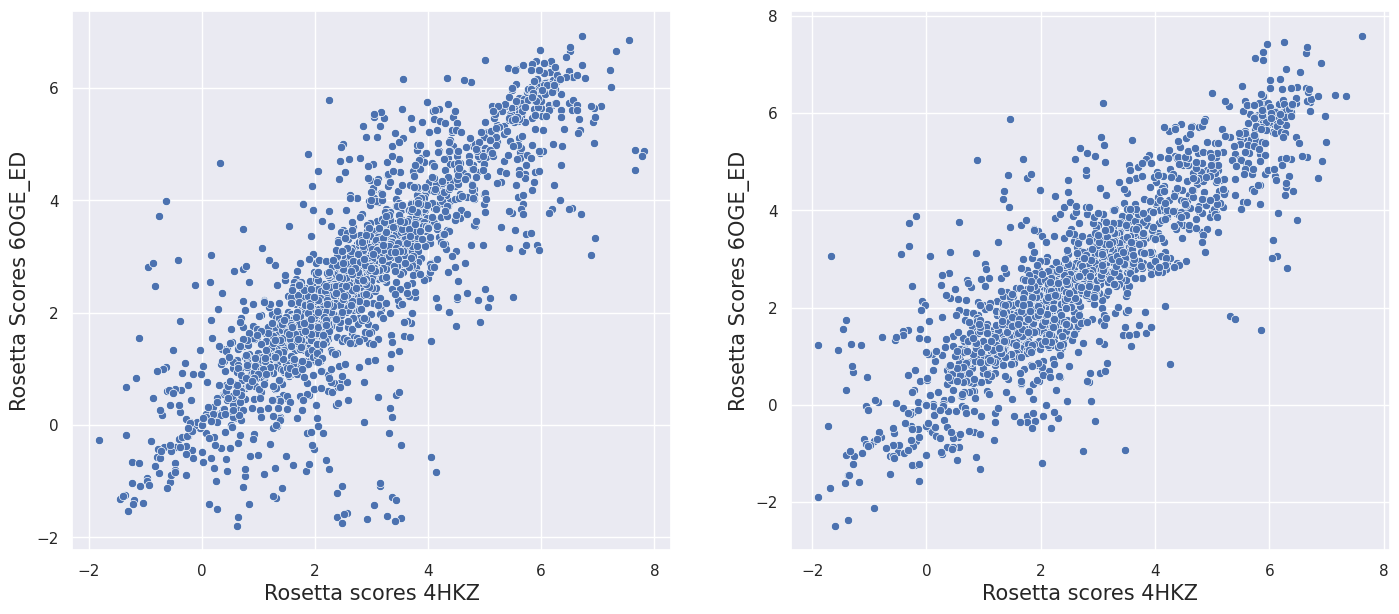

In [4]:
"""
Create the directory for storing output files if it doesn't exist already.
This directory will contain the visualizations generated by the script.
"""

os.makedirs("Final work/Validation against clinically approved drugs/Resolutions", exist_ok=True)
output_folder = "Final work/Validation against clinically approved drugs/Resolutions/Resolution pictures"

"""
Dictionary containing file paths as keys and corresponding PDB codes and resolutions as values.
"""

file_paths = {
    "4hkz_BA.csv": ("4hkz", 2.08),
    "1n8z_BA.csv": ("1n8z", 2.52),
    "7mn8_DC.csv": ("7mn8", 3.45),
    "6oge_CB.csv": ("6oge_CB", 4.36),
    "6oge_ED.csv": ("6oge_ED", 4.36)
}

dfs = {}  # Initialise an empty dictionary to store DataFrames

for file_name, (pdb_code, resolution) in file_paths.items():

    """
    Iterate over each file in 'file_paths', read the CSV file, and store it as a DataFrame in 'dfs' dictionary.
    """
    
    file_path = os.path.join("Clean files", file_name)
    df = pd.read_csv(file_path)
    df["position"] = df["position"].astype(str)
    dfs[pdb_code] = df

# Merge dataframes
df_4hkz_1n8z = pd.merge(dfs["4hkz"], dfs["1n8z"], on=["chain", "position", "WT_AA", "MUT_AA"], how="left")
df_4hkz_7mn8 = pd.merge(dfs["4hkz"], dfs["7mn8"], on=["chain", "position", "WT_AA", "MUT_AA"], how="left")
df_4hkz_6oge_CB = pd.merge(dfs["4hkz"], dfs["6oge_CB"], on=["chain", "pos", "WT_AA", "MUT_AA"], how="left")
df_4hkz_6oge_ED = pd.merge(dfs["4hkz"], dfs["6oge_ED"], on=["chain", "pos", "WT_AA", "MUT_AA"], how="left")

    
def plot_scatterplot_by_chain(df, pdb_code_left, pdb_code_right, output_folder):
    """
    Define a function to plot scatterplots for each chain, based on provided DataFrames.
    pdb_code_left - pdb code for the left dataframe (x)
    pdb_code_right - pdb code for the right dataframe (y)
    """
    plt.clf()
    L_chain = df[df["chain"] == "L"]
    H_chain = df[df["chain"] == "H"]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
    
    sns.set_theme()
    sns.scatterplot(data= H_chain, x="Rosetta normalised_x", y="Rosetta normalised_y", ax=axes[0])  # Use column names directly
    axes[0].set_xlabel(f"Rosetta scores {pdb_code_left}", size=15)
    axes[0].set_ylabel(f"Rosetta Scores {pdb_code_right}", size=15)
    # axes[0].set_title(f"H chain")
    
    sns.scatterplot(data= L_chain, x="Rosetta normalised_x", y="Rosetta normalised_y", ax=axes[1])  # Use column names directly
    axes[1].set_xlabel(f"Rosetta scores {pdb_code_left}", size=15)
    axes[1].set_ylabel(f"Rosetta Scores {pdb_code_right}", size=15)
    # axes[1].set_title(f"L chain")
    plt.savefig(f"{output_folder}/{pdb_code_left}_{pdb_code_right}_rosetta_score_distribution_scatterplot.png", bbox_inches="tight")


plot_scatterplot_by_chain(df_4hkz_1n8z, "4hkz".upper(), "1n8z".upper(), output_folder)
plot_scatterplot_by_chain(df_4hkz_7mn8, "4hkz".upper(), "7mn8".upper(), output_folder)
# plot_scatterplot_by_chain(df_4hkz_6oge_CB, "4hkz".upper(), "6oge_CB".upper(), output_folder)  # this is not the correct 6oge pdb file to use
plot_scatterplot_by_chain(df_4hkz_6oge_ED, "4hkz".upper(), "6oge_ED".upper(), output_folder)

<Figure size 640x480 with 0 Axes>

<Figure size 1700x700 with 0 Axes>

<Figure size 1700x700 with 0 Axes>

<Figure size 1700x700 with 0 Axes>

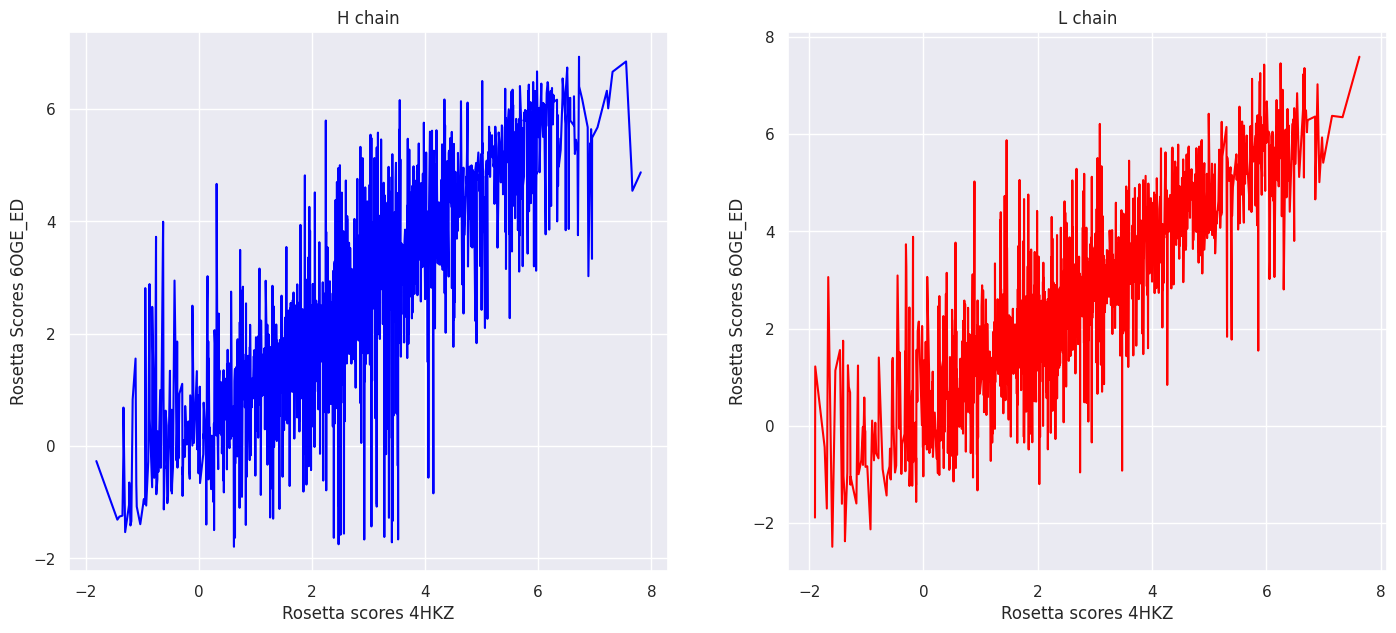

In [4]:
def plot_median_and_error(df, pdb_code_left, pdb_code_right, output_folder):
    """
    Define a function to plot median line and error lines for each DataFrame.
    pdb_code_left - pdb code for the left dataframe (x)
    pdb_code_right - pdb code for the right dataframe (y)
    """
    plt.clf()
    L_chain = df[df["chain"] == "L"]
    H_chain = df[df["chain"] == "H"]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
    
    sns.set_theme()

    # Plot median line for H chain
    sns.lineplot(data=H_chain, x="Rosetta normalised_x", y="Rosetta normalised_y", estimator=np.mean, ax=axes[0], errorbar=None, color='blue')
    # Plot error lines for H chain
    # sns.lineplot(data=H_chain, x="Rosetta normalised_x", y="Rosetta normalised_y", estimator=np.median, ax=axes[0], errorbar='sd', color='blue', alpha=0.3)
    
    axes[0].set_xlabel(f"Rosetta scores {pdb_code_left}")
    axes[0].set_ylabel(f"Rosetta Scores {pdb_code_right}")
    axes[0].set_title(f"H chain")
    
    # Plot median line for L chain
    sns.lineplot(data=L_chain, x="Rosetta normalised_x", y="Rosetta normalised_y", estimator=np.mean, ax=axes[1], errorbar=None, color='red')
    # Plot error lines for L chain
    # sns.lineplot(data=L_chain, x="Rosetta normalised_x", y="Rosetta normalised_y", estimator=np.median, ax=axes[1], errorbar='sd', color='blue', alpha=0.3)
    
    axes[1].set_xlabel(f"Rosetta scores {pdb_code_left}")
    axes[1].set_ylabel(f"Rosetta Scores {pdb_code_right}")
    axes[1].set_title(f"L chain")
    
    plt.savefig(f"{output_folder}/{pdb_code_left}_{pdb_code_right}_rosetta_score_median_error_lines.png", bbox_inches="tight")

plot_median_and_error(df_4hkz_1n8z, "4hkz".upper(), "1n8z".upper(), output_folder)
plot_median_and_error(df_4hkz_7mn8, "4hkz".upper(), "7mn8".upper(), output_folder)
plot_median_and_error(df_4hkz_6oge_CB, "4hkz".upper(), "6oge_CB".upper(), output_folder)  # this is not the correct 6oge pdb file to use
plot_median_and_error(df_4hkz_6oge_ED, "4hkz".upper(), "6oge_ED".upper(), output_folder)

<Figure size 640x480 with 0 Axes>

<Figure size 1700x700 with 0 Axes>

<Figure size 1700x700 with 0 Axes>

<Figure size 1700x700 with 0 Axes>

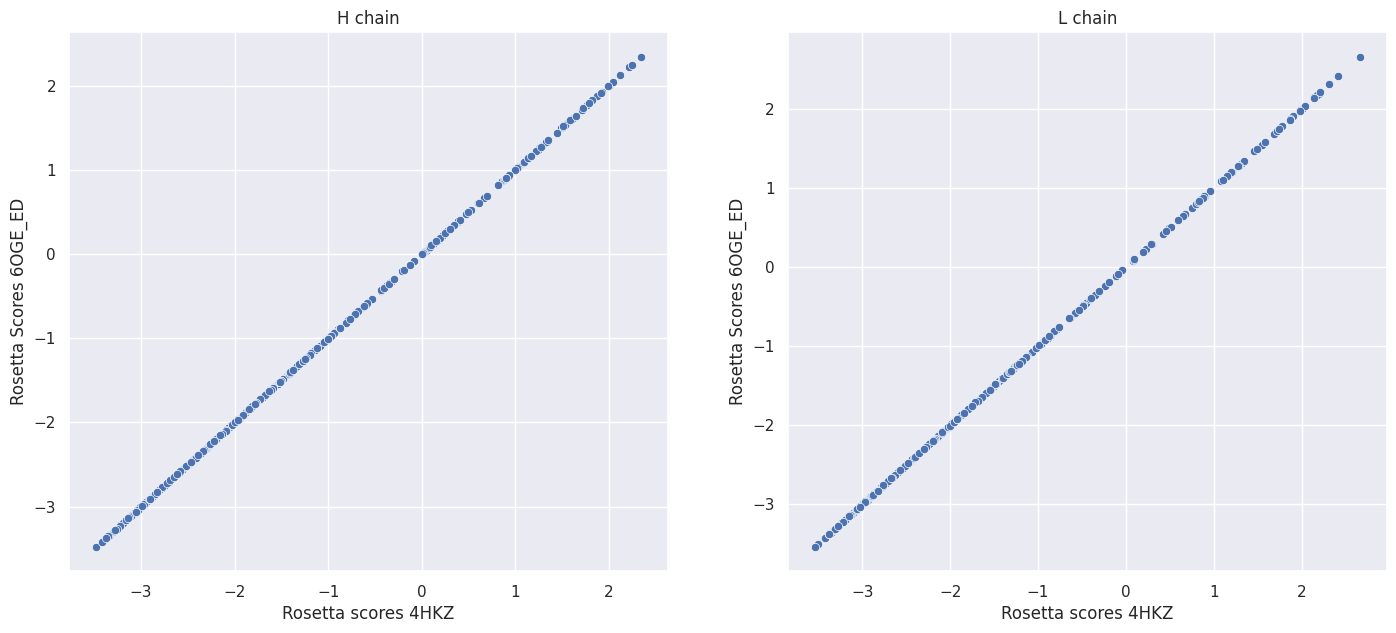

In [5]:
os.makedirs("Final work/Validation against clinically approved drugs/Resolutions", exist_ok=True)
output_folder = "Final work/Validation against clinically approved drugs/Resolutions"
file_paths = {
    "4hkz_BA.csv": ("4hkz", 2.08),
    "1n8z_BA.csv": ("1n8z", 2.52),
    "7mn8_DC.csv": ("7mn8", 3.45),
    "6oge_CB.csv": ("6oge_CB", 4.36),
    "6oge_ED.csv": ("6oge_ED", 4.36)
}

dfs = {}  # Initialise an empty dictionary to store DataFrames

for file_name, (pdb_code, resolution) in file_paths.items():
    file_path = os.path.join("Clean files", file_name)
    df = pd.read_csv(file_path)
    df["position"] = df["position"].astype(str)
    dfs[pdb_code] = df


df_4hkz_1n8z = pd.merge(dfs["4hkz"], dfs["1n8z"], on=["chain", "position", "WT_AA", "MUT_AA"], how="left")
df_4hkz_7mn8 = pd.merge(dfs["4hkz"], dfs["7mn8"], on=["chain", "position", "WT_AA", "MUT_AA"], how="left")
df_4hkz_6oge_CB = pd.merge(dfs["4hkz"], dfs["6oge_CB"], on=["chain", "pos", "WT_AA", "MUT_AA"], how="left")
df_4hkz_6oge_ED = pd.merge(dfs["4hkz"], dfs["6oge_ED"], on=["chain", "pos", "WT_AA", "MUT_AA"], how="left")
    
def plot_scatterplot_by_chain(df, pdb_code_left, pdb_code_right, output_folder):
    plt.clf()
    L_chain = df[df["chain"] == "L"]
    H_chain = df[df["chain"] == "H"]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
    
    sns.set_theme()
    sns.scatterplot(data= H_chain, x="AntiBERTy normalised_x", y="AntiBERTy normalised_y", ax=axes[0])  # Use column names directly
    axes[0].set_xlabel(f"Rosetta scores {pdb_code_left}")
    axes[0].set_ylabel(f"Rosetta Scores {pdb_code_right}")
    axes[0].set_title(f"H chain")
    
    sns.scatterplot(data= L_chain, x="AntiBERTy normalised_x", y="AntiBERTy normalised_y", ax=axes[1])  # Use column names directly
    axes[1].set_xlabel(f"Rosetta scores {pdb_code_left}")
    axes[1].set_ylabel(f"Rosetta Scores {pdb_code_right}")
    axes[1].set_title(f"L chain")
    plt.savefig(f"{output_folder}/{pdb_code_left}_{pdb_code_right}_antiberty_score_distribution_scatterplot.png")


plot_scatterplot_by_chain(df_4hkz_1n8z, "4hkz".upper(), "1n8z".upper(), output_folder)
plot_scatterplot_by_chain(df_4hkz_7mn8, "4hkz".upper(), "7mn8".upper(), output_folder)
plot_scatterplot_by_chain(df_4hkz_6oge_CB, "4hkz".upper(), "6oge_CB".upper(), output_folder)
plot_scatterplot_by_chain(df_4hkz_6oge_ED, "4hkz".upper(), "6oge_ED".upper(), output_folder)